# Read & Plot Time Series Data

In [429]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
import os

<Figure size 640x480 with 0 Axes>

In [4]:
pwd

'C:\\Users\\user'

In [5]:
os.chdir('C:\\Users\\user\\Downloads\\Data sets')

# Split Data in Training and Test

In [132]:
Petrol = pd.read_csv('Petrol.csv')
Petrol.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


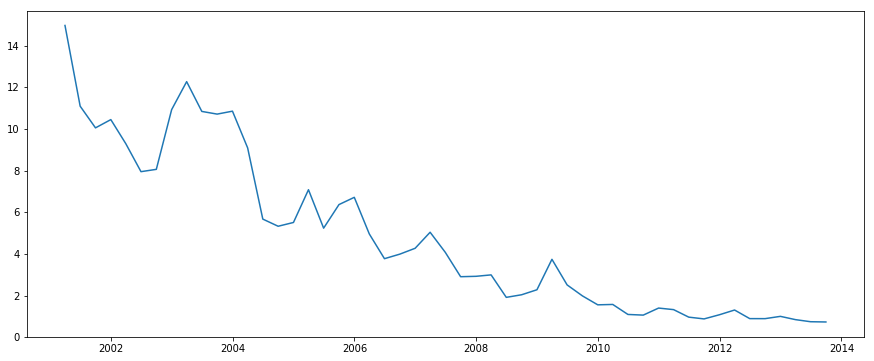

In [133]:
date_rng = pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
date_rng
Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Petrol.head()
plt.plot(Petrol.TimeIndex, Petrol.Consumption)
pyplot.show()

In [134]:
#Creating train and test set 
train=Petrol[0:int(len(Petrol)*0.7)] 
test=Petrol[int(len(Petrol)*0.7):]

In [135]:
type(train)
train.head()

,Year,Quarter,Consumption,TimeIndex
0,2001,Q1,14.978,2001-03-31
1,2001,Q2,11.099,2001-06-30
2,2001,Q3,10.057,2001-09-30
3,2001,Q4,10.454,2001-12-31
4,2002,Q1,9.295,2002-03-31


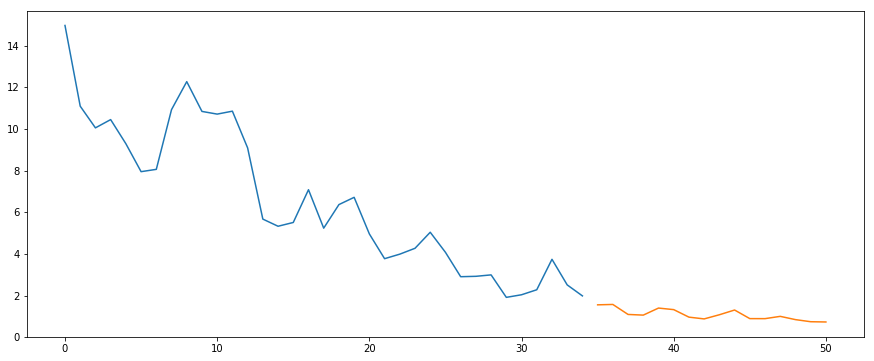

In [136]:
plt.plot(train.Consumption)
plt.plot(test.Consumption)
pyplot.show()

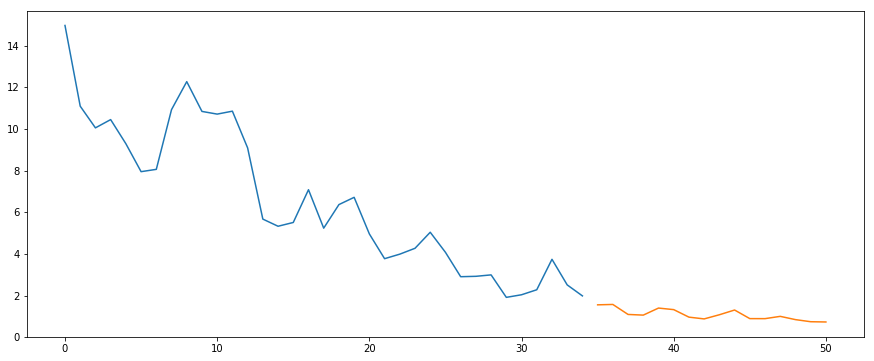

In [137]:
train.Consumption.plot()
test.Consumption.plot()

# Simple Exponential Smoothing

In [153]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [154]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Consumption']))

In [155]:
# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)   #optimised is true when model choose its own alpha value or smoothing level.
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

In [120]:
fcst_SES = test.copy()

In [121]:
fcst_SES['SES99'] = model99_fit.forecast(len(test['Consumption']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Consumption']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Consumption']))

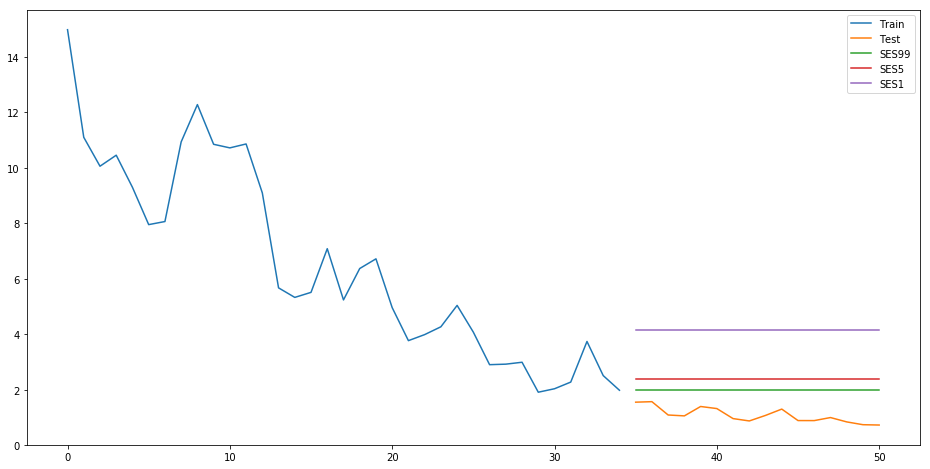

In [122]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')

In [123]:
fcst_SES['SES99']

35    1.986998
36    1.986998
37    1.986998
38    1.986998
39    1.986998
40    1.986998
41    1.986998
42    1.986998
43    1.986998
44    1.986998
45    1.986998
46    1.986998
47    1.986998
48    1.986998
49    1.986998
50    1.986998
Name: SES99, dtype: float64

In [124]:
#
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [125]:
mean_absolute_percentage_error(test['Consumption'],fcst_SES['SES99'])

94.50460480680182

In [126]:
rmse = sqrt(mean_squared_error(test['Consumption'],fcst_SES['SES99']))
rmse

0.9437879263674692

In [127]:
model_opt_fit = model.fit()

In [128]:
model_opt_fit.model.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 14.978,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Double Exponential (Holt)

In [226]:
model = Holt(np.asarray(train['Consumption']))
model31_fit = model.fit(smoothing_level = 0.35,smoothing_slope = 0.25,optimized=False)

In [227]:
model31_fit = model.fit(smoothing_level = 0.35,smoothing_slope = 0.25,optimized=False)

In [228]:
fcst_Holt = test.copy()

In [229]:
fcst_Holt['Holt31'] = model31_fit.forecast(len(test['Consumption']))

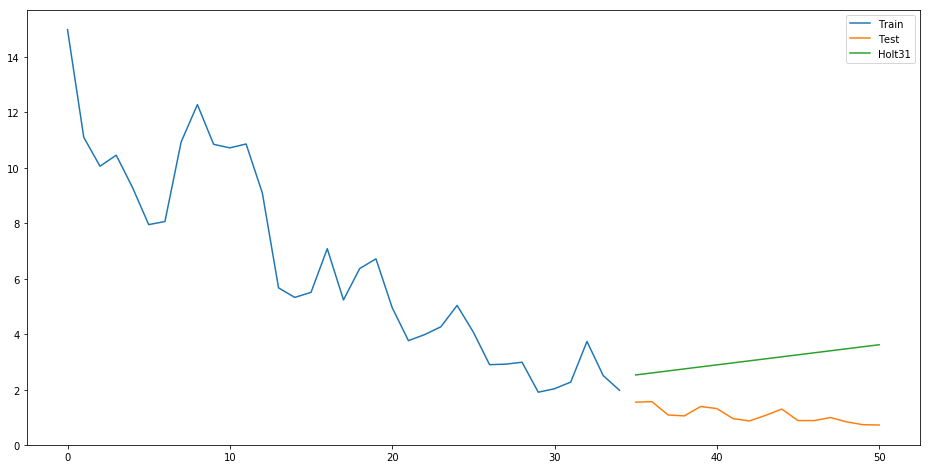

In [220]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(fcst_Holt['Holt31'], label='Holt31')
plt.legend(loc='best')

In [221]:
modelopt_fit = model.fit()

In [222]:
fcst_Holt['Opt'] = modelopt_fit.forecast(len(test['Consumption']))

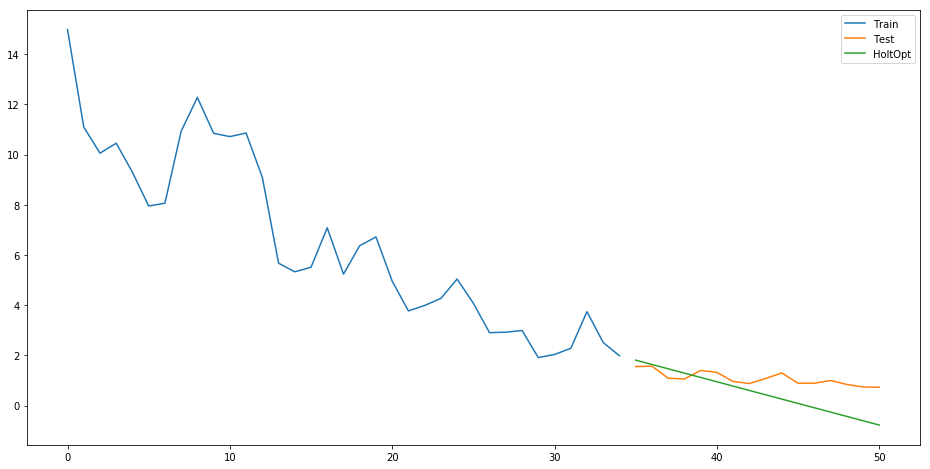

In [223]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(fcst_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')

In [230]:
mean_absolute_percentage_error(test['Consumption'],fcst_Holt['Holt31'])

28.39111327772831

In [225]:
modelopt_fit.model.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.019969001062225343,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 15.127123022596482,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
india gdp double exponential

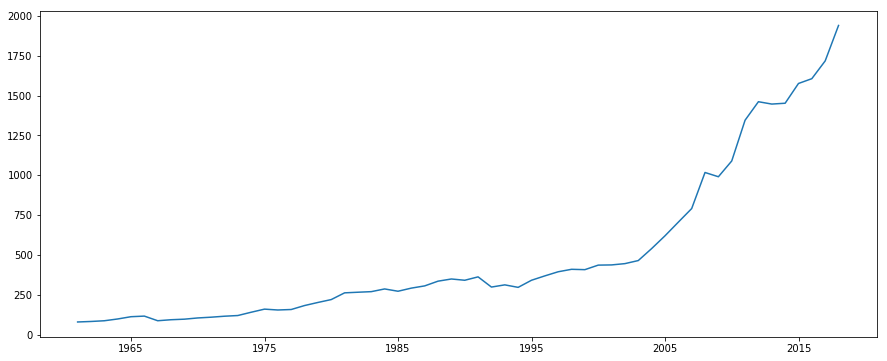

In [231]:
exp_india=indiaGDP.copy()
plt.plot(indiaGDP.TimeIndex1, indiaGDP.GDPpercapita)
pyplot.show()

In [256]:
exp_india

,Year,GDPpercapita,TimeIndex1
0,1960,81.284764,1960-12-31
1,1961,84.426437,1961-12-31
2,1962,88.914919,1962-12-31
3,1963,100.048592,1963-12-31
4,1964,114.315161,1964-12-31
5,1965,118.063382,1965-12-31
6,1966,89.053583,1966-12-31
7,1967,95.330783,1967-12-31
8,1968,98.831235,1968-12-31
9,1969,106.496379,1969-12-31


In [382]:
#Creating train and test set 
train1=indiaGDP[0:55] 
test1=indiaGDP[55:]

In [383]:
train1.tail(3)

,Year,GDPpercapita,TimeIndex1
52,2012,1446.985410,2012-12-31
53,2013,1452.195373,2013-12-31
54,2014,1576.004018,2014-12-31


In [385]:
model1 = Holt(np.asarray(train1['GDPpercapita']))
model311_fit = model1.fit(smoothing_level = 0.80,smoothing_slope = 0.19,optimized=False)

In [386]:
fcst_Holt = test1.copy()

In [387]:
fcst_Holt['Holt31'] = model311_fit.forecast(len(test1['GDPpercapita']))

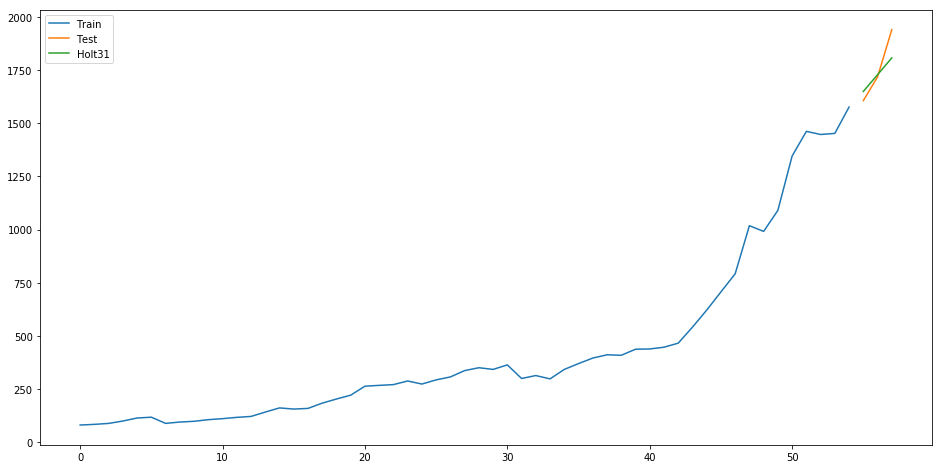

In [388]:
plt.figure(figsize=(16,8))
plt.plot(train1['GDPpercapita'], label='Train')
plt.plot(test1['GDPpercapita'], label='Test')
plt.plot(fcst_Holt['Holt31'], label='Holt31')
plt.legend(loc='best')

In [389]:
modelopt_fit = model.fit()

In [390]:
fcst_Holt['Opt'] = modelopt_fit.forecast(len(test1['GDPpercapita']))

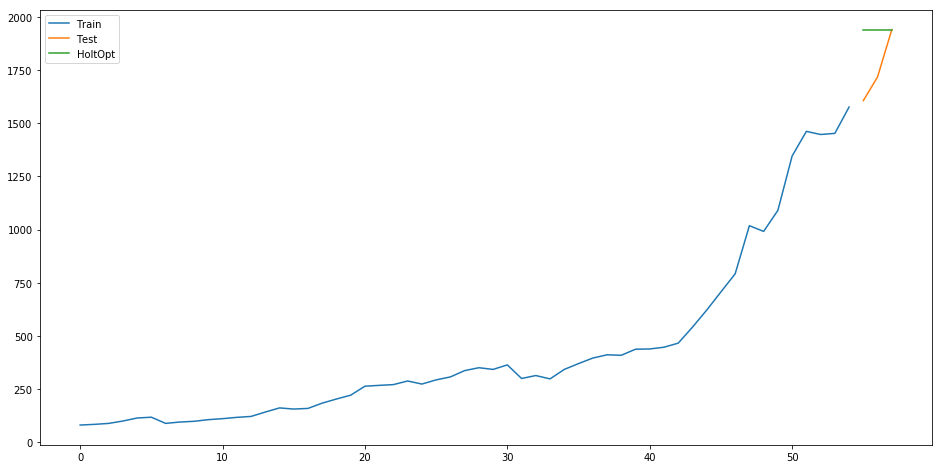

In [391]:
plt.figure(figsize=(16,8))
plt.plot(train1['GDPpercapita'], label='Train')
plt.plot(test1['GDPpercapita'], label='Test')
plt.plot(fcst_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')

In [392]:
mean_absolute_percentage_error(test1['GDPpercapita'],fcst_Holt['Holt31'])

3.3846774538724165

In [395]:
fcst_Holt['Opt']

55    1939.612984
56    1939.612984
57    1939.612984
Name: Opt, dtype: float64

In [394]:
model311_fit.fittedvalues

array([  84.42643693,   84.57723724,   87.0978142 ,   91.4689148 ,
        102.55418429,  117.97216208,  124.06820035,   96.75734703,
         96.10009818,   99.18414256,  107.04452721,  113.06593969,
        119.80556555,  124.90551302,  145.02715105,  167.18967275,
        165.67278879,  166.83929628,  189.61456284,  211.71778946,
        232.15729304,  274.78329254,  285.32973794,  288.2096821 ,
        302.37934793,  289.36042337,  303.05358487,  317.57752398,
        347.17917574,  364.51752204,  358.31348766,  374.92372329,
        315.77809268,  314.66821201,  299.4317955 ,  338.56382605,
        373.09100588,  404.21143563,  423.82480372,  423.76898591,
        448.57141192,  453.07927641,  459.57832453,  477.23427715,
        550.42595115,  639.98645367,  736.63754594,  832.40116547,
       1060.70252348, 1074.49628125, 1158.72640601, 1408.36499091,
       1559.11680993, 1560.47396335, 1548.4550187 ])

In [377]:
model311_fit.fittedfcast

array([  84.42643693,   84.57723724,   87.0978142 ,   91.4689148 ,
        102.55418429,  117.97216208,  124.06820035,   96.75734703,
         96.10009818,   99.18414256,  107.04452721,  113.06593969,
        119.80556555,  124.90551302,  145.02715105,  167.18967275,
        165.67278879,  166.83929628,  189.61456284,  211.71778946,
        232.15729304,  274.78329254,  285.32973794,  288.2096821 ,
        302.37934793,  289.36042337,  303.05358487,  317.57752398,
        347.17917574,  364.51752204,  358.31348766,  374.92372329,
        315.77809268,  314.66821201,  299.4317955 ,  338.56382605,
        373.09100588,  404.21143563,  423.82480372,  423.76898591,
        448.57141192,  453.07927641,  459.57832453,  477.23427715,
        550.42595115,  639.98645367,  736.63754594,  832.40116547,
       1060.70252348, 1074.49628125, 1158.72640601, 1408.36499091,
       1559.11680993, 1560.47396335, 1548.4550187 ])

In [378]:
fcst_Holt['Holt31'] 

55    1548.455019
56    1623.058946
57    1697.662874
Name: Holt31, dtype: float64

In [397]:
test1= [2018,2019,2020]


In [398]:
model311_fit.forecast(len(test1))

array([1649.28559366, 1728.07696919, 1806.86834471])

# fitting holt winter( triple exponential)

In [400]:
air_pax=pd.read_csv('AirPax.csv')
air_pax.head(5)

,Year,Month,Pax
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [401]:
air_pax.tail(2)

,Year,Month,Pax
142,1960,Nov,390
143,1960,Dec,432


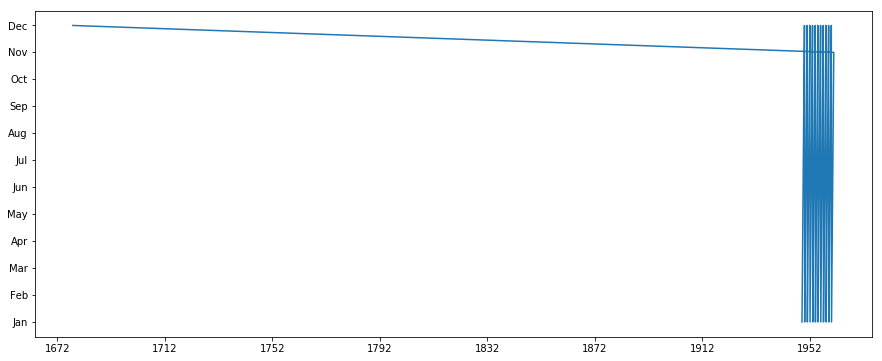

In [402]:
date_rng01 = pd.date_range(start='1/1/1949', end='30/12/1960', freq='m')
date_rng01
air_pax['TimeIndex'] = pd.DataFrame(date_rng01, columns=['Monthly'])
air_pax.head()
plt.plot(air_pax.TimeIndex, air_pax.Month)
pyplot.show()

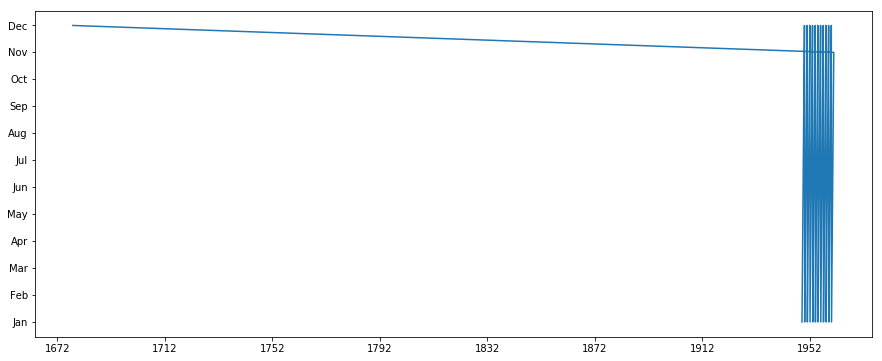

In [403]:
air_pax['TimeIndex'] = pd.DataFrame(date_rng01, columns=['Monthly'])
plt.plot(air_pax.TimeIndex, air_pax.Month)
pyplot.show()

In [404]:
air_pax.

,Year,Month,Pax,TimeIndex
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31
5,1949,Jun,135,1949-06-30
6,1949,Jul,148,1949-07-31
7,1949,Aug,148,1949-08-31
8,1949,Sep,136,1949-09-30
9,1949,Oct,119,1949-10-31


In [633]:
#Creating train and test set 
train01=air_pax[0:120] 
test01=air_pax[120:]

In [634]:
train01.tail(3)

,Year,Month,Pax,TimeIndex
117,1958,Oct,359,1958-10-31
118,1958,Nov,310,1958-11-30
119,1958,Dec,337,1958-12-31


In [635]:
test01.head(3)

,Year,Month,Pax,TimeIndex
120,1959,Jan,360,1959-01-31
121,1959,Feb,342,1959-02-28
122,1959,Mar,406,1959-03-31


In [636]:
model_fit=ExponentialSmoothing(np.asarray(train01['Pax']),seasonal_periods=12,seasonal='add').fit(optimized=True)

In [637]:
fcst_holtw=test01.copy()

In [638]:
fcst_holtw

,Year,Month,Pax,TimeIndex
120,1959,Jan,360,1959-01-31
121,1959,Feb,342,1959-02-28
122,1959,Mar,406,1959-03-31
123,1959,Apr,396,1959-04-30
124,1959,May,420,1959-05-31
125,1959,Jun,472,1959-06-30
126,1959,Jul,548,1959-07-31
127,1959,Aug,559,1959-08-31
128,1959,Sep,463,1959-09-30
129,1959,Oct,407,1959-10-31


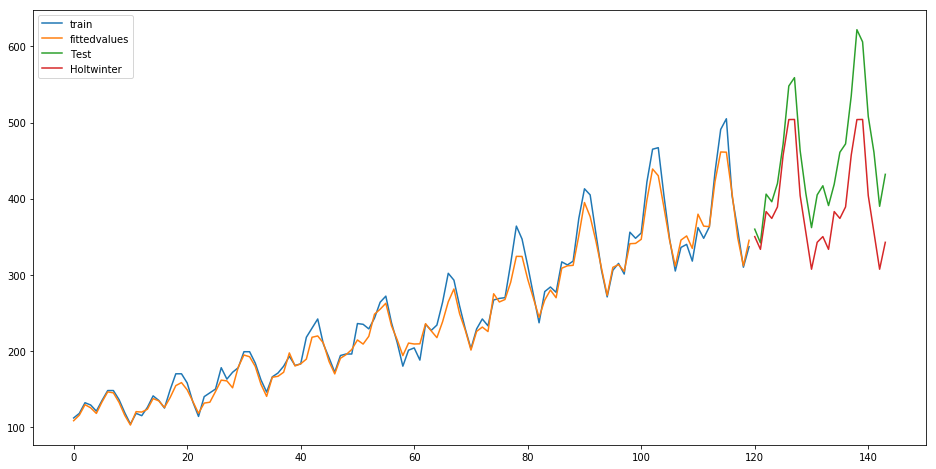

In [639]:
fcst_holtw['holtw']=model_fit.forecast(len(test01['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train01['Pax'],label='train')
plt.plot(model_fit.fittedvalues,label='fittedvalues')
plt.plot(test01['Pax'], label='Test')
plt.plot(fcst_holtw['holtw'], label='Holtwinter')
plt.legend(loc='best')

In [640]:
model2_fit=ExponentialSmoothing(np.asarray(train01['Pax']),trend='add',seasonal_periods=12,seasonal='mul').fit(optimized=True)

In [641]:
model3_fit=ExponentialSmoothing(np.asarray(train01['Pax']),trend='add',seasonal_periods=12,seasonal='mul').fit(smoothing_level=0.3,smoothing_slope=0.3,smoothing_seasonal=0.3,optimized=False)

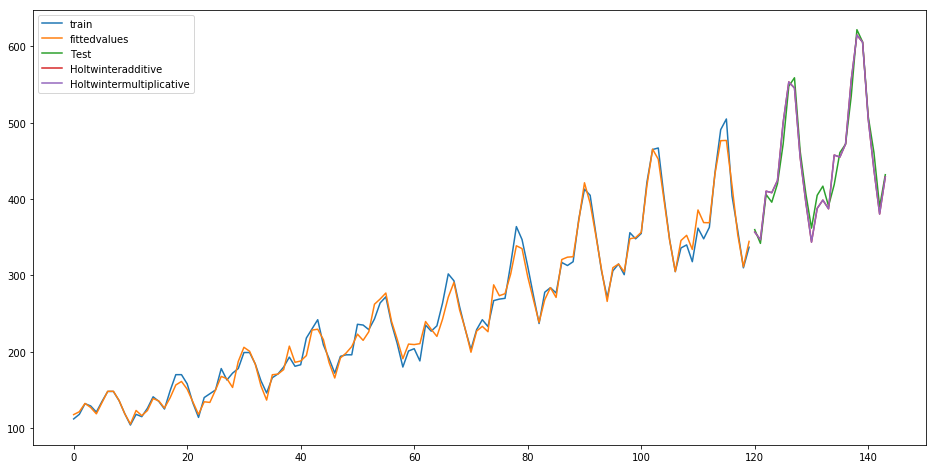

In [642]:
fcst_holtw['holtw']=model3_fit.forecast(len(test01['Pax']))

fcst_holtw['holtw1']=model3_fit.forecast(len(test01['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train01['Pax'],label='train')
plt.plot(model2_fit.fittedvalues,label='fittedvalues')
plt.plot(test01['Pax'], label='Test')
plt.plot(fcst_holtw['holtw1'], label='Holtwinteradditive')
plt.plot(fcst_holtw['holtw1'], label='Holtwintermultiplicative')
plt.legend(loc='best')

In [643]:
mean_absolute_percentage_error(test01['Pax'],fcst_holtw['holtw1'])

2.5272143627493837

In [644]:
model3_fit.params

{'smoothing_level': 0.3,
 'smoothing_slope': 0.3,
 'smoothing_seasonal': 0.3,
 'damping_slope': nan,
 'initial_level': 212.4,
 'initial_slope': 1.0833333333333333,
 'initial_seasons': array([0.52730697, 0.55555556, 0.62146893, 0.60734463, 0.56967985,
        0.63559322, 0.69679849, 0.69679849, 0.64030132, 0.56026365,
        0.48964218, 0.55555556]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [457]:
fcst_holtw['holtw1']

120    356.783735
121    346.927095
122    410.406783
123    408.430912
124    424.253329
125    500.177957
126    553.546029
127    545.552943
128    454.811964
129    395.596702
130    343.667041
131    387.862791
132    398.727392
133    387.316320
134    457.727220
135    455.075349
136    472.247983
137    556.233314
138    615.008379
139    605.572440
140    504.393944
141    438.334980
142    380.463821
143    429.024387
Name: holtw1, dtype: float64

In [490]:
test01=['jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [492]:
model3_fit.forecast(len(test01))

array([356.78373543, 346.92709528, 410.40678254, 408.43091197,
       424.25332874, 500.1779573 , 553.54602918, 545.55294305,
       454.8119645 , 395.5967023 , 343.66704063, 387.8627906 ,
       398.72739206, 387.31631957, 457.72722008, 455.07534868,
       472.2479834 , 556.23331447, 615.00837892, 605.57243994,
       504.39394399, 438.33498038, 380.46382098, 429.02438711,
       440.67104869, 427.70554386, 505.04765762, 501.7197854 ,
       520.24263807, 612.28867164, 676.47072866, 665.59193683,
       553.97592349, 481.07325846, 417.26060134, 470.18598362,
       482.61470531, 468.09476815, 552.36809516, 548.36422212,
       568.23729273, 668.34402881, 737.9330784 , 725.61143373,
       603.55790298, 523.81153654, 454.05738169, 511.34758013])

In [493]:
future=pd.DataFrame()

In [494]:
future['month']=test01

In [495]:
future['Pax']=model3_fit.forecast(len(test01))

In [496]:
future

,month,Pax
0,jan,356.783735
1,Feb,346.927095
2,Mar,410.406783
3,Apr,408.430912
4,May,424.253329
5,Jun,500.177957
6,Jul,553.546029
7,Aug,545.552943
8,Sep,454.811964
9,Oct,395.596702


# log transfrom _air pax


In [498]:
log=air_pax.copy()

In [501]:
log

,Year,Month,Pax,TimeIndex
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31
5,1949,Jun,135,1949-06-30
6,1949,Jul,148,1949-07-31
7,1949,Aug,148,1949-08-31
8,1949,Sep,136,1949-09-30
9,1949,Oct,119,1949-10-31


In [502]:
log['Pax']=np.log(air_pax.Pax)

,Year,Month,Pax,TimeIndex
0,1949,Jan,4.718499,1949-01-31
1,1949,Feb,4.770685,1949-02-28
2,1949,Mar,4.882802,1949-03-31
3,1949,Apr,4.859812,1949-04-30
4,1949,May,4.795791,1949-05-31
5,1949,Jun,4.905275,1949-06-30
6,1949,Jul,4.997212,1949-07-31
7,1949,Aug,4.997212,1949-08-31
8,1949,Sep,4.912655,1949-09-30
9,1949,Oct,4.779123,1949-10-31


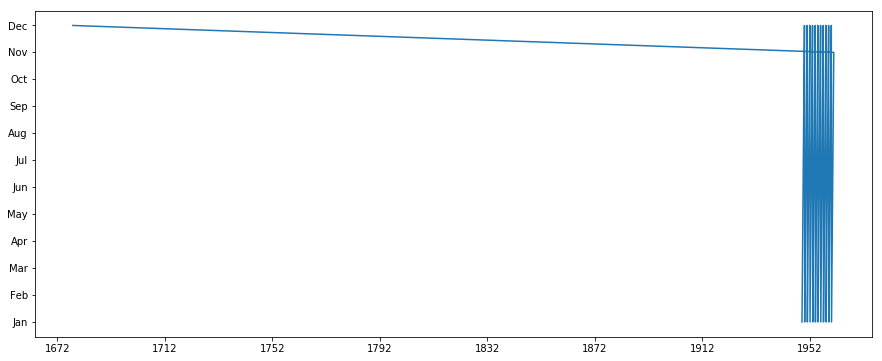

In [504]:
date_rng001 = pd.date_range(start='1/1/1949', end='30/12/1960', freq='m')
date_rng001
log['TimeIndex'] = pd.DataFrame(date_rng01, columns=['Monthly'])

plt.plot(log.TimeIndex, log.Month)
pyplot.show()

In [508]:
monthly_pax1 = pd.pivot_table(log, values = "Pax", columns = "Month", index = "Year")


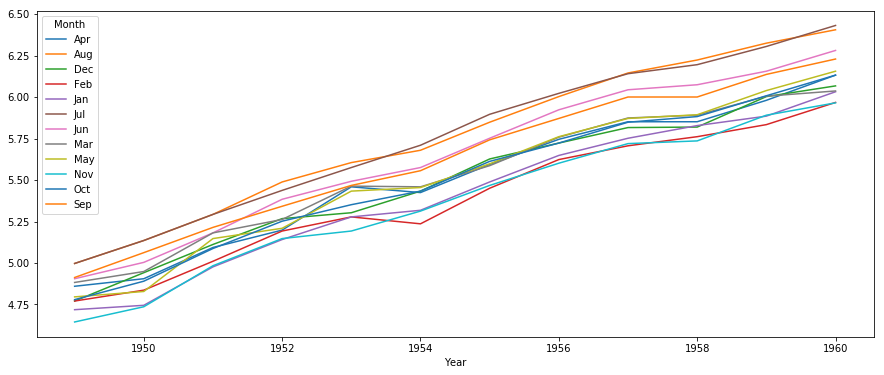

In [509]:
monthly_pax1.plot()

In [627]:
#Creating train and test set 
train001=log[0:120] 
test001=log[120:]

In [628]:
fcst_holtw11=test001.copy()

In [629]:
model4_fit=ExponentialSmoothing(np.asarray(train001['Pax']),trend='add',seasonal_periods=12,seasonal='add').fit(smoothing_level=0.3,smoothing_slope=0.3,smoothing_seasonal=0.3,optimized=False)

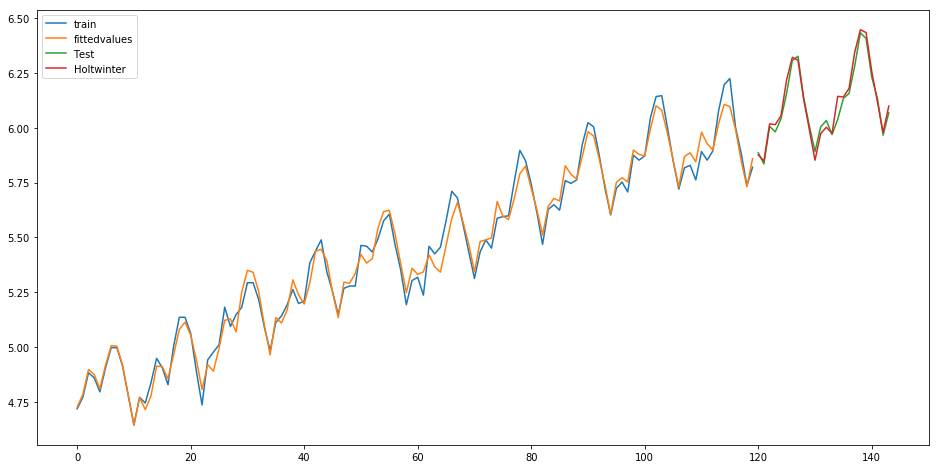

In [630]:
fcst_holtw11['holtw11']=model4_fit.forecast(len(test001['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train001['Pax'],label='train')
plt.plot(model4_fit.fittedvalues,label='fittedvalues')
plt.plot(test001['Pax'], label='Test')
plt.plot(fcst_holtw11['holtw11'], label='Holtwinter')
plt.legend(loc='best')

In [588]:
model5_fit=ExponentialSmoothing(np.asarray(train001['Pax']),trend='add',seasonal_periods=12,seasonal='mul').fit(smoothing_level=0.3,smoothing_slope=0.3,smoothing_seasonal=0.3,optimized=False)

In [589]:
fcst_holtw11['holtw12']=model5_fit.forecast(len(test001['Pax']))

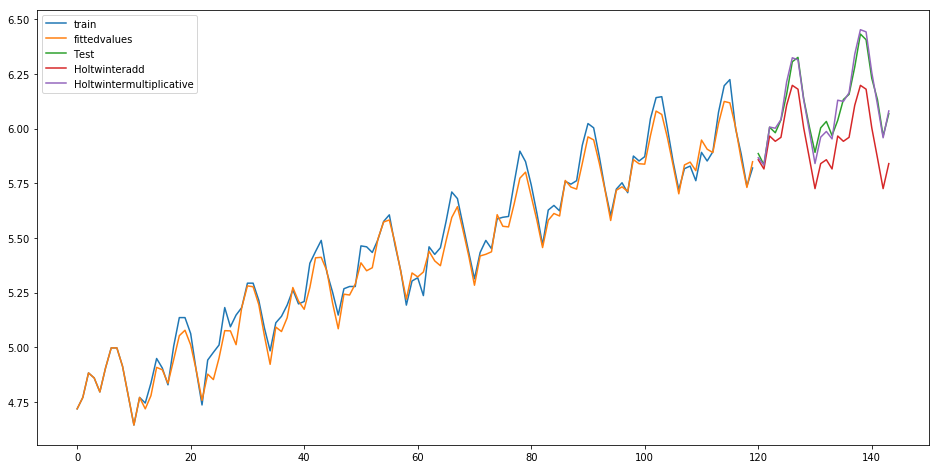

In [590]:
fcst_holtw11['holtw11']=model4_fit.forecast(len(test001['Pax']))

fcst_holtw11['holtw12']=model5_fit.forecast(len(test001['Pax']))

plt.figure(figsize=(16,8))
plt.plot(train001['Pax'],label='train')
plt.plot(model4_fit.fittedvalues,label='fittedvalues')
plt.plot(test001['Pax'], label='Test')
plt.plot(fcst_holtw11['holtw11'], label='Holtwinteradd')
plt.plot(fcst_holtw11['holtw12'], label='Holtwintermultiplicative')
plt.legend(loc='best')

In [599]:
mean_absolute_percentage_error(test001['Pax'],fcst_holtw11['holtw11'])

0.42942767655480585

In [600]:
model4_fit.params

{'smoothing_level': 0.3,
 'smoothing_slope': 0.3,
 'smoothing_seasonal': 0.3,
 'damping_slope': nan,
 'initial_level': 5.289749317241005,
 'initial_slope': 0.007887146229203537,
 'initial_seasons': array([-0.57125045, -0.51906469, -0.40694739, -0.42993691, -0.49395877,
        -0.38447454, -0.29253704, -0.29253704, -0.37709443, -0.51062582,
        -0.64535842, -0.51906469]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [601]:
fcst_holtw11['holtw11']

120    5.876415
121    5.848158
122    6.017232
123    6.014191
124    6.054077
125    6.218869
126    6.321185
127    6.307989
128    6.130264
129    5.991779
130    5.852018
131    5.973293
132    6.002347
133    5.974090
134    6.143164
135    6.140124
136    6.180010
137    6.344801
138    6.447117
139    6.433921
140    6.256196
141    6.117711
142    5.977951
143    6.099226
Name: holtw11, dtype: float64

In [602]:
test001=['jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [603]:
model4_fit.forecast(len(test001))

array([5.87641486, 5.8481581 , 6.01723224, 6.01419132, 6.05407747,
       6.21886895, 6.32118499, 6.30798853, 6.13026355, 5.99177911,
       5.85201843, 5.97329334, 6.0023471 , 5.97409034, 6.14316448,
       6.14012356, 6.18000971, 6.34480119, 6.44711724, 6.43392078,
       6.25619579, 6.11771135, 5.97795067, 6.09922558, 6.12827934,
       6.10002258, 6.26909672, 6.26605581, 6.30594196, 6.47073343,
       6.57304948, 6.55985302, 6.38212803, 6.24364359, 6.10388291,
       6.22515783, 6.25421159, 6.22595483, 6.39502897, 6.39198805,
       6.4318742 , 6.59666567, 6.69898172, 6.68578526, 6.50806027,
       6.36957583, 6.22981515, 6.35109007])

In [618]:
testdf=pd.DataFrame()

In [619]:
testdf['month']=test001

In [620]:
testdf['Pax']=model4_fit.forecast(len(test001))

In [621]:
testdf

,month,Pax
0,jan,5.876415
1,Feb,5.848158
2,Mar,6.017232
3,Apr,6.014191
4,May,6.054077
5,Jun,6.218869
6,Jul,6.321185
7,Aug,6.307989
8,Sep,6.130264
9,Oct,5.991779


In [622]:
testdf['added Pax']=np.exp(testdf.Pax)

In [623]:
testdf

,month,Pax,added Pax
0,jan,5.876415,356.528743
1,Feb,5.848158,346.595398
2,Mar,6.017232,410.441020
3,Apr,6.014191,409.194799
4,May,6.054077,425.845870
5,Jun,6.218869,502.134970
6,Jul,6.321185,556.231734
7,Aug,6.307989,548.939664
8,Sep,6.130264,459.557261
9,Oct,5.991779,400.125845


In [624]:
future

,month,Pax
0,jan,356.783735
1,Feb,346.927095
2,Mar,410.406783
3,Apr,408.430912
4,May,424.253329
5,Jun,500.177957
6,Jul,553.546029
7,Aug,545.552943
8,Sep,454.811964
9,Oct,395.596702


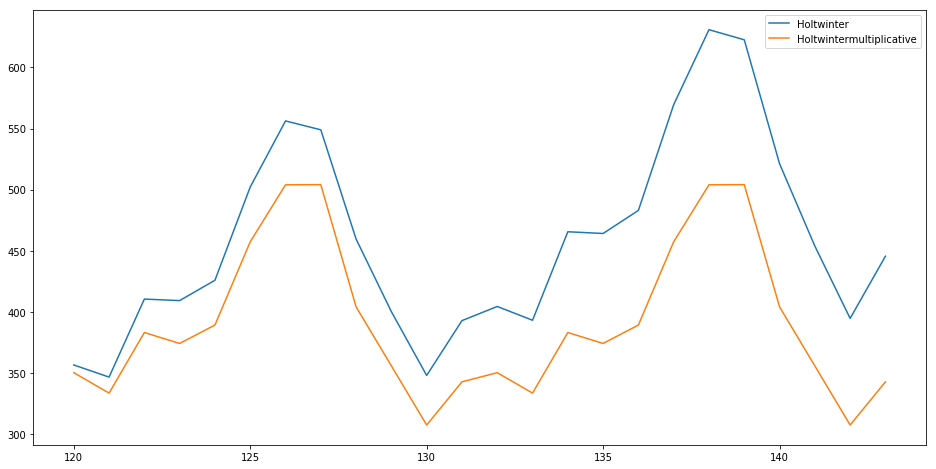

In [651]:

plt.figure(figsize=(16,8))
plt.plot(np.exp(fcst_holtw11['holtw11']), label='Holtwinter')
plt.plot(fcst_holtw['holtw1'], label='Holtwintermultiplicative')
plt.legend(loc='best')